In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist


In [0]:
(x_trai, y_trai), (x_test, y_test) = mnist.load_data()


In [0]:
y_trai=np.eye(10,dtype=float)[y_trai]
y_test=np.eye(10,dtype=float)[y_test]
x_trai=x_trai/255.0
x_test=x_test/255.0

In [15]:
y_trai.shape


(60000, 10)

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_trai,y_trai,test_size = 0.081,random_state=256)


In [17]:
x_train.shape[0]%100

40

In [18]:
# NETWORK TOPOLOGIES
n_hidden_1 = 256 
n_hidden_2 = 128 
n_input    = 784 
n_classes  = 10  

# INPUTS AND OUTPUTS
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])
    
# NETWORK PARAMETERS
stddev = 0.1
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev=stddev)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=stddev)),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev=stddev))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}
print ("NETWORK READY")

NETWORK READY


In [0]:

layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1'])) 
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))

In [22]:
# PREDICTION
pred = (tf.matmul(layer_2, weights['out']) + biases['out'])

# LOSS AND OPTIMIZER
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)) 
# optm = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost) 
optm = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost) 
corr = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))    
accr = tf.reduce_mean(tf.cast(corr, "float"))

# INITIALIZER
init = tf.initialize_all_variables()
print ("FUNCTIONS READY")

FUNCTIONS READY


In [0]:
n_b=0
def next_batch(batch_size):
  remove=batch_size
  global n_b
  n_b+=batch_size
  if n_b>x_train.shape[0]:
    remove=x_train.shape[0]%batch_size
    n_b=x_train.shape[0]
    
  return x_train[n_b-remove:n_b],y_train[n_b-remove:n_b]
  

In [24]:
import time
# PARAMETERS
training_epochs = 20
batch_size      = 8
display_step    = 1
num_examples=y_train.shape[0]
# LAUNCH THE GRAPH
sess = tf.Session()
sess.run(init)
# OPTIMIZE

for epoch in range(training_epochs):
    start=time.time()
    avg_cost = 0.
    total_batch = int(num_examples/batch_size)
    if num_examples%batch_size!=0:
      total_batch+=1
    n_b=0
    # ITERATION
    for i in range(total_batch):
      
        batch_xs, batch_ys = next_batch(batch_size)
        batch_xs=[x.flatten() for x in batch_xs]
        feeds = {x: batch_xs, y: batch_ys}
        sess.run(optm, feed_dict=feeds)
        avg_cost += sess.run(cost, feed_dict=feeds)
    avg_cost = avg_cost / total_batch
    # DISPLAY
    end=time.time()
    if (epoch+1) % display_step == 0:
        print ("Time : %d s " % (int(end-start)))
        
        print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
        feeds = {x: batch_xs, y: batch_ys}
        train_acc = sess.run(accr, feed_dict=feeds)
        print ("TRAIN ACCURACY: %.3f" % (train_acc))
        feeds = {x: [x.flatten() for x in x_val], y:y_val}
        test_acc = sess.run(accr, feed_dict=feeds)
        print ("TEST ACCURACY: %.3f" % (test_acc))
print ("OPTIMIZATION FINISHED")

Time : 19 s 
Epoch: 000/020 cost: 0.160774084
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.958
Time : 18 s 
Epoch: 001/020 cost: 0.059611638
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.966
Time : 18 s 
Epoch: 002/020 cost: 0.035383350
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.965
Time : 18 s 
Epoch: 003/020 cost: 0.023354859
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.970
Time : 18 s 
Epoch: 004/020 cost: 0.018888272
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.968
Time : 18 s 
Epoch: 005/020 cost: 0.013957769
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.970
Time : 18 s 
Epoch: 006/020 cost: 0.011900627
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.971
Time : 18 s 
Epoch: 007/020 cost: 0.010384624
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.976
Time : 18 s 
Epoch: 008/020 cost: 0.008866445
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.978
Time : 19 s 
Epoch: 009/020 cost: 0.008585700
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.974
Time : 18 s 
Epoch: 010/020 cost: 0.007709829
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.976
Time : 18 s 
Epoch: 0

In [0]:
feeds = {x: [x.flatten() for x in x_train[[0,1]]]}
qq=sess.run(layer_1, feed_dict=feeds)

In [41]:
qq.shape

(2, 256)

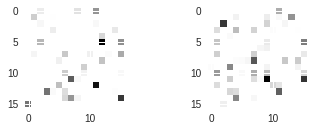

In [42]:
plt.subplot(221)
plt.imshow(qq[0].reshape(16,16))
plt.subplot(222)
plt.imshow(qq[1].reshape(16,16))



In [0]:
pppp=[x.flatten() for x in x_train[[0,1]]]

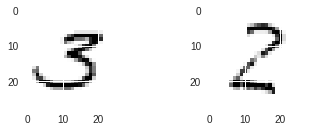

In [39]:
plt.subplot(221)
plt.imshow(pppp[0].reshape(28,28))
plt.subplot(222)
plt.imshow(pppp[1].reshape(28,28))
